# Fluxonium Design with 6 single qubits NEW-SIMPLE look

### Preparations

In [1]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict
import matplotlib.pyplot as plt

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer

from qiskit_metal.analyses.sweep_and_optimize.sweeping import Sweeping


import pyEPR as epr
from qiskit_metal.analyses.quantization import EPRanalysis

In [2]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'
design._chips['main']['size']['size_x'] = '9mm'
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True


eig_qres = EPRanalysis(design, "hfss")
hfss = design.renderers.hfss
hfss = eig_qres.sim.renderer
q3d = design.renderers.q3d


gui = MetalGUI(design)

In [3]:
#Just keep it here, do NOT use
#Setup the launchpad1 location and orientation

## Read In launch pad
launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='-3.99mm', orientation='0',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='58um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPReadIn', options = launch_options)


# Read Out launch pad
launch_options = dict(chip='main', pos_x='4.1mm', pos_y='3.99mm', orientation='180',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPReadOut', options = launch_options)


from collections import OrderedDict
#anchors1 = OrderedDict()
#anchors1[0] = np.array([-0.5, 4.0])


Transmission_Line = {'pin_inputs':
           {'start_pin': {'component': 'LPReadIn', 'pin': 'tie'},
             'end_pin': {'component': 'LPReadOut', 'pin': 'tie'}},
            'lead': {'start_straight': '300um', 'end_straight': '4070um',
                    # 'start_jogged_extension': jogs_in,
                    # 'anchors': anchors1,
                    }, 
                    'total_length': '8mm', 'fillet': "90um"
            }

TransLine = RoutePathfinder(design, 'TL', Transmission_Line)


gui.rebuild()

In [4]:
## Q1 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='-2.66mm', orientation='0',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPCL1', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='-1.33mm', orientation='0',
                     lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPFB1', options = launch_options)


## Q2 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='0.0mm', orientation='0',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPCL2', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='+1.33mm', orientation='0',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPFB2', options = launch_options)


## Q3 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='2.66mm', orientation='0',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPCL3', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='3.99mm', orientation='0',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPFB3', options = launch_options)


## Q4 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.1mm', pos_y='2.66mm', orientation='180',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPFB4', options = launch_options)

launch_options = dict(chip='main', pos_x='4.1mm', pos_y='1.33mm', orientation='180',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPCL4', options = launch_options)


## Q5 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.1mm', pos_y='0.0mm', orientation='180',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPFB5', options = launch_options)

launch_options = dict(chip='main', pos_x='4.1mm', pos_y='-1.33mm', orientation='180',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPCL5', options = launch_options)


## Q6 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.1mm', pos_y='-2.66mm', orientation='180',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPFB6', options = launch_options)

launch_options = dict(chip='main', pos_x='4.1mm', pos_y='-3.99mm', orientation='180',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPCL6', options = launch_options)


gui.rebuild()

In [16]:
from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

# Q1 details
options = dict(chip='main', nanowire = False,
    orientation =90, pos_x = '-2.2mm', pos_y = '-2.3mm',
               
    flux_bias_line_options=Dict(make_fbl = True,
                      ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
           ),
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
        **options))

# Q6 details
options = dict(chip='main', nanowire = False,
    orientation =90, pos_x = '2.2mm', pos_y = '-3.2mm',
               
    flux_bias_line_options=Dict(make_fbl = True,
                       ), 
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                     ), 
    readout_line_options=Dict(loc_H = +1, make_rol = True, 
              ) )
               
q6 = FluxoniumPocket(design,'Q6', options = dict(
        **options))


# Q2 details
options = dict(chip='main', nanowire = False,
    orientation =90, pos_x = '-2.2mm', pos_y = '0.2mm',
               
    flux_bias_line_options=Dict(make_fbl = True,
                     ), 
    charge_line_options=Dict(loc_H = +1, make_cl = True,
              ),
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
              ) )
               
q2 = FluxoniumPocket(design,'Q2', options = dict(
        **options))

# Q5 details
options = dict(chip='main', nanowire = False,
    orientation =90, pos_x = '2.4mm', pos_y = '-0.8mm',
               
    flux_bias_line_options=Dict(make_fbl = True,
                       ), 
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                        ), 
    readout_line_options=Dict(loc_H = +1, make_rol = True, 
              ) )
               
q5 = FluxoniumPocket(design,'Q5', options = dict(
        **options))


# Q3 details
options = dict(chip='main', nanowire = False,
    orientation =90, pos_x = '-2.5mm', pos_y = '3.0mm',
               
    flux_bias_line_options=Dict(make_fbl = True,
                       ), 
    charge_line_options=Dict(loc_H = +1, make_cl = True,
          ),
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
              ) )
               
q3 = FluxoniumPocket(design,'Q3', options = dict(
        **options))

# Q4 details
options = dict(chip='main', nanowire = False,
    orientation =90, pos_x = '2.4mm', pos_y = '2.0mm',
               
    flux_bias_line_options=Dict(make_fbl = True,
                       ), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                        ),
    readout_line_options=Dict(loc_H = 1, make_rol = True,  
              ) )
               
q4 = FluxoniumPocket(design,'Q4', options = dict(
        **options))

gui.rebuild()

In [17]:
otg1 = OpenToGround(design, 'otg1s', options=dict(chip='main', 
                 pos_x='-37.733um', pos_y='-2.8mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity1',  Dict(meander=Dict(spacing='200um'),
        total_length='8.4mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg1s', pin='open'),
            end_pin=Dict(component='Q1', pin='readout_line')), ))

gui.rebuild()

In [19]:
otg6 = OpenToGround(design, 'otg6s', options=dict(chip='main', pos_x='37.733um',  pos_y='-2.6mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity6',  Dict(meander=Dict(spacing='200um'),
        total_length='9.0mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg6s', pin='open'),
            end_pin=Dict(component='Q6', pin='readout_line')), ))

gui.rebuild()

In [20]:
otg2 = OpenToGround(design, 'otg2s', options=dict(chip='main', pos_x='-37.733um',  pos_y='-0.2mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity2',  Dict(meander=Dict(spacing='200um'),
        total_length='9.6mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg2s', pin='open'),
            end_pin=Dict(component='Q2', pin='readout_line')), ))

gui.rebuild()

In [21]:
otg5 = OpenToGround(design, 'otg5s', options=dict(chip='main', pos_x='37.733um',  pos_y='-0.1mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity5',  Dict(meander=Dict(spacing='200um'),
        total_length='10.4mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg5s', pin='open'),
            end_pin=Dict(component='Q5', pin='readout_line')), ))

gui.rebuild()

In [22]:
otg3 = OpenToGround(design, 'otg3s', options=dict(chip='main', pos_x='-37.733um',  pos_y='2.6mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity3',  Dict(meander=Dict(spacing='200um'),
        total_length='11.2mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg3s', pin='open'),
            end_pin=Dict(component='Q3', pin='readout_line')), ))

gui.rebuild()

In [23]:
otg4 = OpenToGround(design, 'otg4s', options=dict(chip='main', pos_x='37.733um',  pos_y='2.6mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity4',  Dict(meander=Dict(spacing='200um'),
        total_length='11.6mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg4s', pin='open'),
            end_pin=Dict(component='Q4', pin='readout_line')), ))


gui.rebuild()
gui.autoscale()

In [25]:
# Charge Line and Flux Bias Line for Q1

XYCharge_LineQ1 = RoutePathfinder(design, 'XY_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='150um', end_straight='600um', 
                      ),
                         pin_inputs=Dict( start_pin=Dict(
                                          component='Q1',
                                               pin='charge_line'),
                                                end_pin=Dict(
                                            component='LPCL1',
                                            pin='tie')
                                            )))

gui.rebuild()

In [26]:
# Charge Line and Flux Bias Line for Q1

ZFluxBias_LineQ1 = RoutePathfinder(design, 'Z_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='200um', 
        end_straight='400um', ),
        pin_inputs=Dict(start_pin=Dict(component='Q1', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB1', pin='tie')
                                   )))

gui.rebuild()

In [27]:
# Charge Lıne and Flux Bias Line for Q2

XYCharge_LineQ2 = RoutePathfinder(design, 'XY_Gate2', options = dict(chip='main',
                        fillet='80um',
                lead=dict(start_straight='150um', end_straight='850um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q2',
                                                    pin='charge_line'),
                                                end_pin=Dict(
                                                    component='LPCL2',
                                                    pin='tie')
                                            )))

gui.rebuild()

In [28]:
# Charge Lıne and Flux Bias Line for Q2

ZFluxBias_LineQ2 = RoutePathfinder(design, 'Z_Gate2', options = dict(chip='main',
             fillet='99um',
          lead=dict(start_straight='250um', end_straight='250um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q2',
                                                    pin='flux_bias_line'),
                                                end_pin=Dict(
                                                    component='LPFB2',
                                                    pin='tie')
                                            )))

gui.rebuild()

In [31]:
# Charge Lıne and Flux Bias Line for Q3

XYCharge_LineQ3 = RoutePathfinder(design, 'XY_Gate3', options = dict(chip='main',
                         fillet='99um',
       lead=dict(start_straight='250um', end_straight='500um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q3',
                                                    pin='charge_line'),
                                                end_pin=Dict(
                                                    component='LPCL3',
                                                    pin='tie')
                                            )))
gui.rebuild()

In [32]:
# Charge Lıne and Flux Bias Line for Q3

ZFluxBias_LineQ3 = RoutePathfinder(design, 'Z_Gate3', options = dict(chip='main',
                                   fillet='99um',
           lead=dict(start_straight='100um', end_straight='200um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q3',
                                                    pin='flux_bias_line'),
                                                end_pin=Dict(
                                                    component='LPFB3',
                                                    pin='tie')
                                            )))

gui.rebuild()

In [33]:
# Charge Lıne and Flux Bias Line for Q6

XYCharge_LineQ6 = RoutePathfinder(design, 'XY_Gate6', 
        options = dict(chip='main', fillet='99um',
        lead=dict(start_straight='100um', end_straight='250um'),
    pin_inputs=Dict(start_pin=Dict(component='Q6', pin='charge_line'),
    end_pin=Dict(component='LPCL6', pin='tie')
                                            )))

gui.rebuild()

In [34]:
# Charge Lıne and Flux Bias Line for Q6
ZFluxBias_LineQ6 = RoutePathfinder(design, 'Z_Gate6', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='350um', end_straight='350um'),
        pin_inputs=Dict(start_pin=Dict(component='Q6', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB6', pin='tie')
                                   )))

gui.rebuild()

In [35]:
# Charge Lıne and Flux Bias Line for Q5

XYCharge_LineQ5 = RoutePathfinder(design, 'XY_Gate5', options = dict(chip='main',
                          fillet='99um',
            lead=dict(start_straight='150um', end_straight='850um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q5',
                                                    pin='charge_line'),
                                                end_pin=Dict(
                                                    component='LPCL5',
                                                    pin='tie')
                                            )))

gui.rebuild()

In [36]:
# Charge Lıne and Flux Bias Line for Q5

ZFluxBias_LineQ5 = RoutePathfinder(design, 'Z_Gate5', options = dict(chip='main',
                        fillet='99um',
            lead=dict(start_straight='200um', end_straight='450um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q5',
                                                    pin='flux_bias_line'),
                                                end_pin=Dict(
                                                    component='LPFB5',
                                                    pin='tie')
                                            )))
gui.rebuild()

In [37]:
# Charge Line and Flux Bias Line for Q4

XYCharge_LineQ4 = RoutePathfinder(design, 'XY_Gate4', options = dict(chip='main',
                                 fillet='99um',
                    lead=dict(start_straight='200um', end_straight='550um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q4',
                                                    pin='charge_line'),
                                                end_pin=Dict(
                                                    component='LPCL4',
                                                    pin='tie')
                                            )))
gui.rebuild()

In [38]:
# Charge Lıne and Flux Bias Line for Q4

ZFluxBias_LineQ4 = RoutePathfinder(design, 'Z_Gate4', options = dict(chip='main',
                                            fillet='99um',
                    lead=dict(start_straight='150um', end_straight='200um'),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q4',
                                                    pin='flux_bias_line'),
                                                end_pin=Dict(
                                                    component='LPFB4',
                                                    pin='tie')
                                            )))
gui.rebuild()

In [39]:
q1 #print Q1 information


name:    Q1
class:   FluxoniumPocket       
options: 
  'pos_x'             : '-2.2mm',                     
  'pos_y'             : '-2.3mm',                     
  'orientation'       : 90,                           
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '10um',                       
  'inductor_orientation': '-1',                         
  'pad_width'         : '15um',                       
  'pad_height'        : '110um',                      
  'pad_radius'        : '45um',                       
  'l_width'           : '1um',                        
  'array_length'      : '130um',                      
  'l_arm_width'       : '2um',                        
  'l_arm_length'      : '25um',                       
  'l_inductance'      : '200nH',                      
  'l_ind_pe

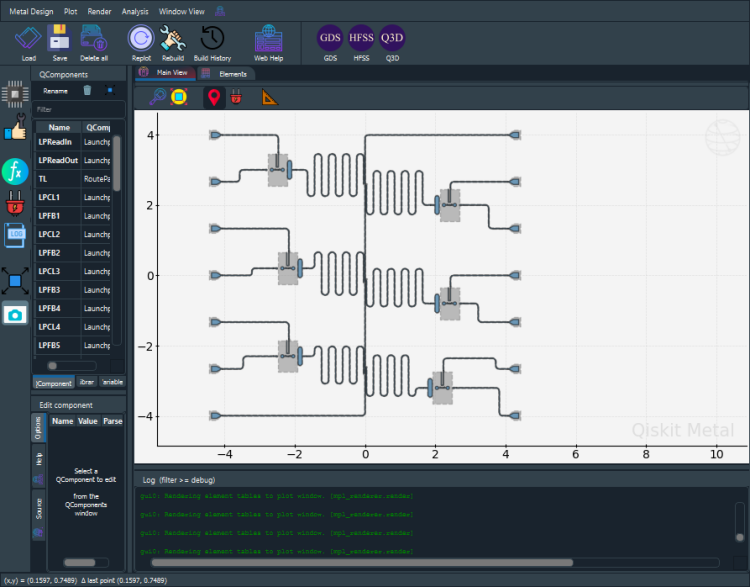

In [40]:
#Save screenshot as a .png formatted file.
gui.screenshot()

In [76]:
gui.main_window.close()

True

## Ansys QRenderer
How to Render a Metal Design into Ansys

!!!Make sure the programm is ready completly.

In [41]:
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer
QAnsysRenderer.default_options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.2,
 'y_buffer_width_mm': 0.2,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [42]:
hfss.open_ansys()

In [43]:
hfss.connect_ansys()

INFO 03:05PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:05PM [load_ansys_project]: 	Opened Ansys App
INFO 03:05PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 03:05PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/figenyilmaz/Documents/Ansoft/
	Project:   Project33
INFO 03:05PM [connect_design]: 	Opened active design
	Design:    FluxoniumEPR_hfss [Solution type: Eigenmode]
INFO 03:05PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:05PM [connect]: 	Connected to project "Project33" and design "FluxoniumEPR_hfss" 😀 



In [44]:
hfss.activate_eigenmode_design("cavity1")

03:05PM 45s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
03:05PM 45s WARNING [activate_ansys_design]: The design_name=cavity1 was not in active project.  Designs in active project are: 
['FluxoniumEPR_hfss'].  A new design will be added to the project.  
INFO 03:05PM [connect_design]: 	Opened active design
	Design:    cavity1 [Solution type: Eigenmode]
WARNING 03:05PM [connect_setup]: 	No design setup detected.
WARNING 03:05PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:05PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [45]:
hfss.render_design(['cavity1'], [('cavity1', 'end'), ('cavity1', 'start')])

In [46]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 10
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
setup.analyze()

hfss.plot_convergences()

INFO 03:06PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


03:07PM 22s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


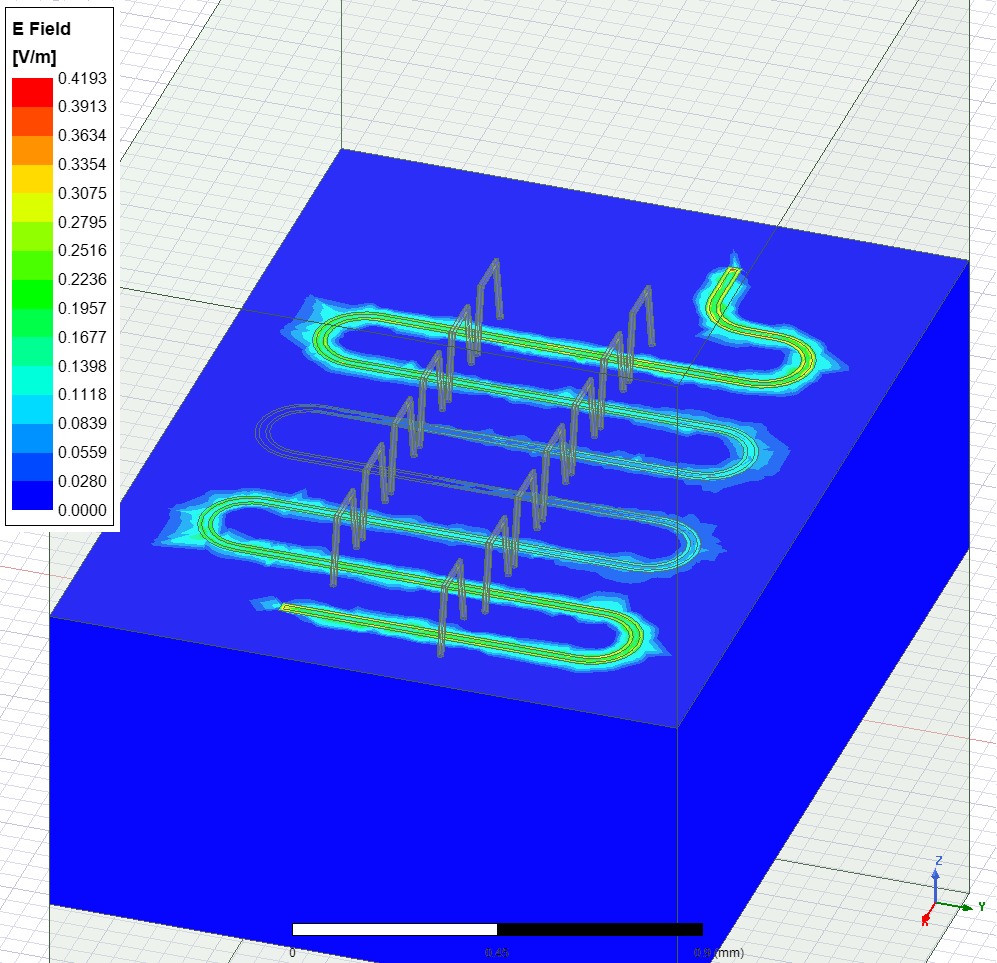

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials_ME/Figen/Fluxonium/ansys.png')

In [47]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [48]:
hfss.epr_get_frequencies()

Design "cavity1" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,6.99561,inf


In [101]:
hfss.activate_eigenmode_design("cavity2")

03:27PM 23s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
03:27PM 23s WARNING [activate_ansys_design]: The design_name=cavity2 was not in active project.  Designs in active project are: 
['cavity1'].  A new design will be added to the project.  
INFO 03:27PM [connect_design]: 	Opened active design
	Design:    cavity2 [Solution type: Eigenmode]
WARNING 03:27PM [connect_setup]: 	No design setup detected.
WARNING 03:27PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:27PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [102]:
hfss.render_design(['cavity2'], [('cavity2', 'end'), ('cavity2', 'start')])

In [103]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 10
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '10 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 03:27PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


In [104]:
hfss.epr_get_frequencies()

Design "cavity2" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,6.190796,inf


In [105]:
hfss.activate_eigenmode_design("cavity3")

03:35PM 44s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
03:35PM 44s WARNING [activate_ansys_design]: The design_name=cavity3 was not in active project.  Designs in active project are: 
['cavity1', 'cavity2'].  A new design will be added to the project.  
INFO 03:35PM [connect_design]: 	Opened active design
	Design:    cavity3 [Solution type: Eigenmode]
WARNING 03:35PM [connect_setup]: 	No design setup detected.
WARNING 03:35PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:35PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [106]:
hfss.render_design(['cavity3'], [('cavity3', 'end'), ('cavity3', 'start')])

In [107]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 10
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '10 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 03:35PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


03:38PM 51s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


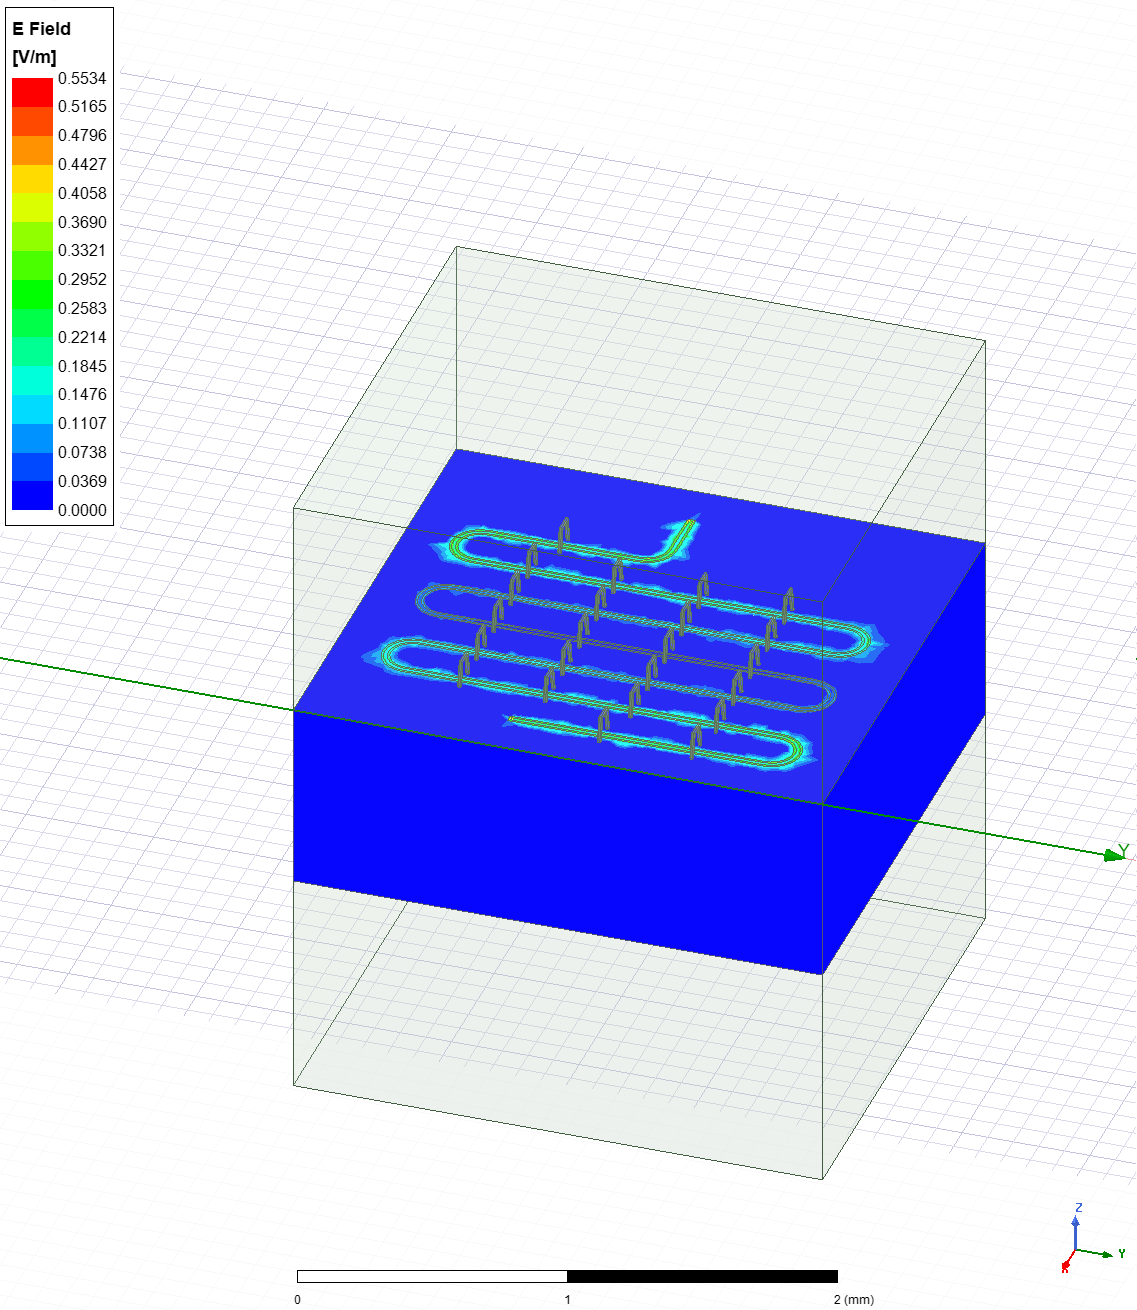

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/ansys.png')

In [108]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [109]:
hfss.epr_get_frequencies()

Design "cavity3" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,5.281032,inf


In [110]:
hfss.activate_eigenmode_design("cavity4")

03:39PM 11s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
03:39PM 11s WARNING [activate_ansys_design]: The design_name=cavity4 was not in active project.  Designs in active project are: 
['cavity1', 'cavity3', 'cavity2'].  A new design will be added to the project.  
INFO 03:39PM [connect_design]: 	Opened active design
	Design:    cavity4 [Solution type: Eigenmode]
WARNING 03:39PM [connect_setup]: 	No design setup detected.
WARNING 03:39PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:39PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [111]:
hfss.render_design(['cavity4'], [('cavity4', 'end'), ('cavity4', 'start')])

In [112]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 10
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '10 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 03:39PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


03:41PM 43s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


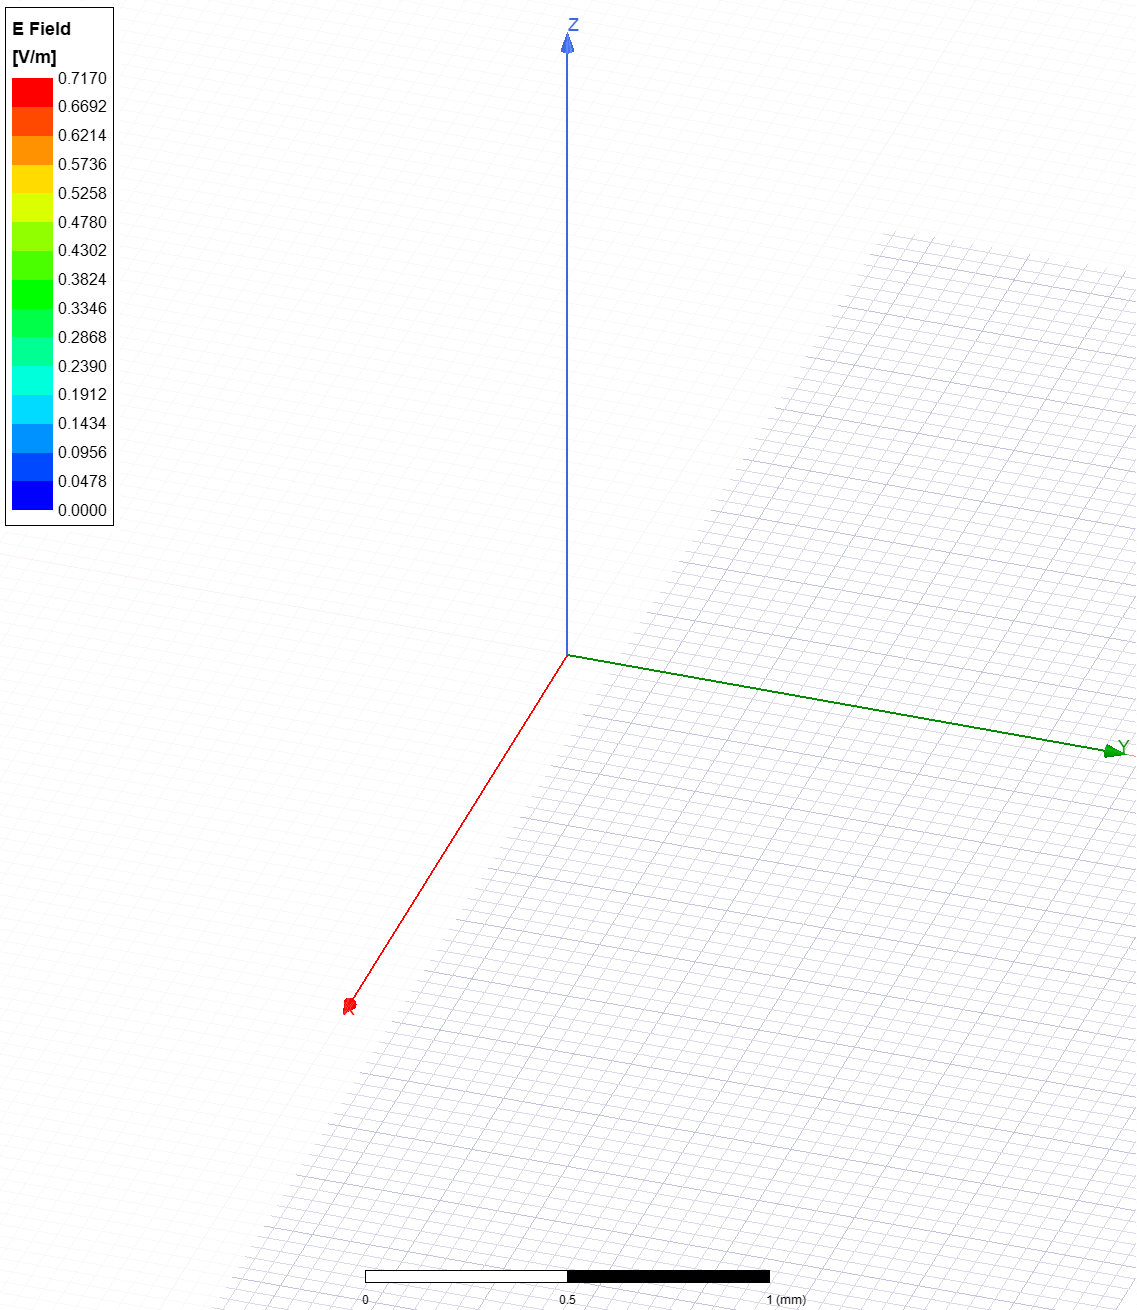

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/ansys.png')

In [113]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [114]:
hfss.epr_get_frequencies()

Design "cavity4" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,5.106185,inf


In [115]:
hfss.activate_eigenmode_design("cavity5")

03:42PM 19s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
03:42PM 19s WARNING [activate_ansys_design]: The design_name=cavity5 was not in active project.  Designs in active project are: 
['cavity1', 'cavity3', 'cavity2', 'cavity4'].  A new design will be added to the project.  
INFO 03:42PM [connect_design]: 	Opened active design
	Design:    cavity5 [Solution type: Eigenmode]
WARNING 03:42PM [connect_setup]: 	No design setup detected.
WARNING 03:42PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:42PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [116]:
hfss.render_design(['cavity5'], [('cavity5', 'end'), ('cavity5', 'start')])

In [117]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 10
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '10 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 03:42PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


03:45PM 11s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


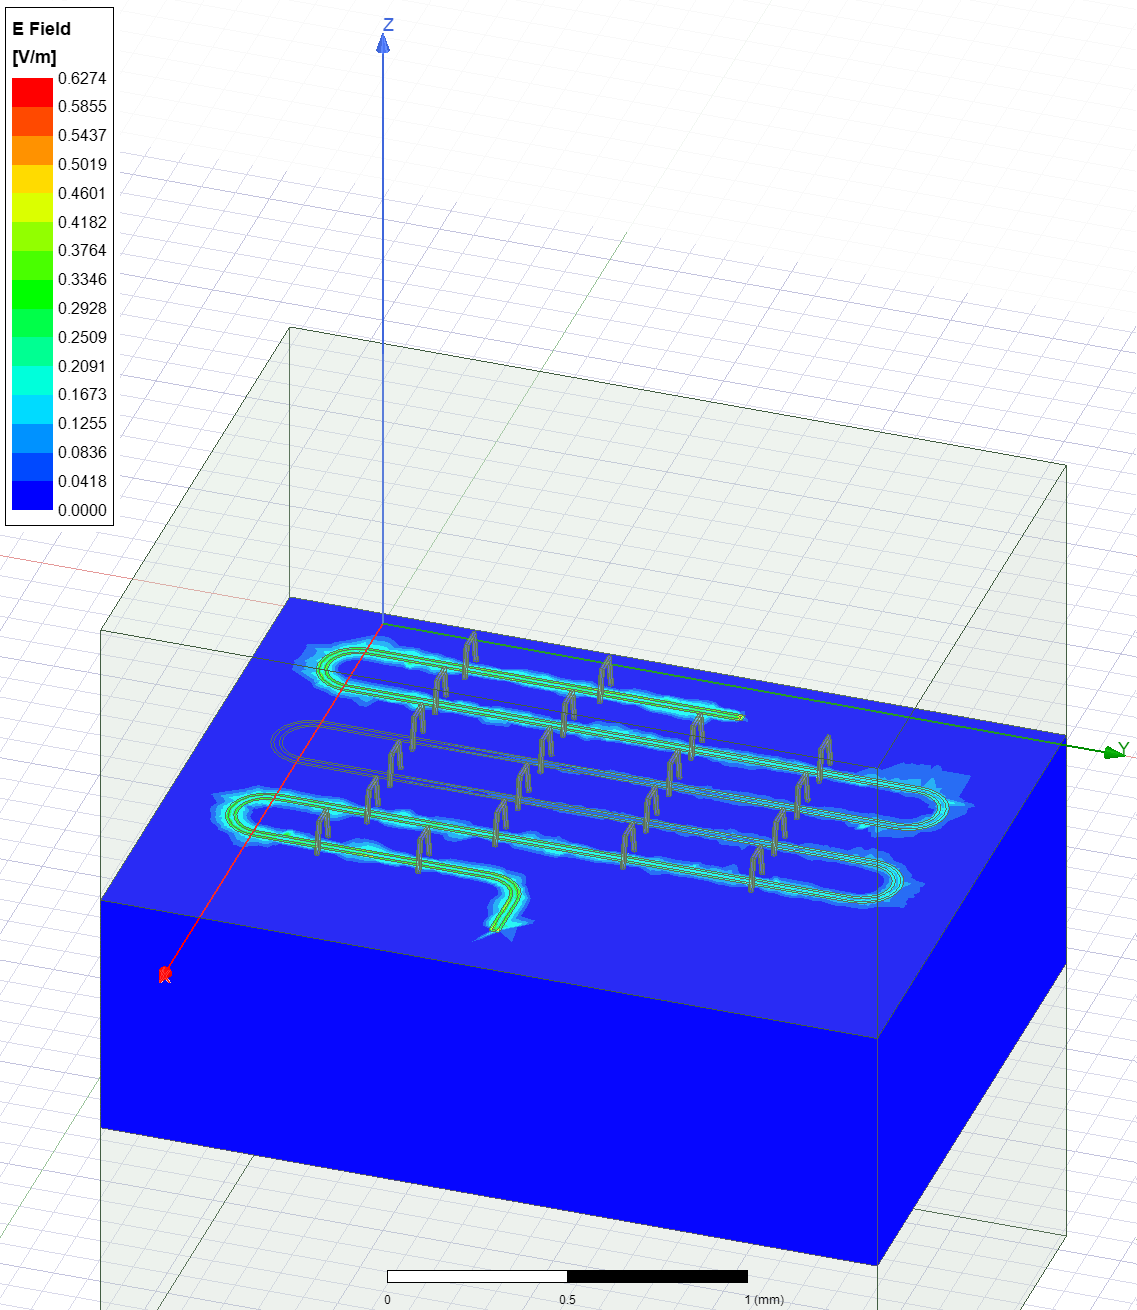

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/ansys.png')

In [118]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [119]:
hfss.epr_get_frequencies()

Design "cavity5" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,5.708682,inf


In [120]:
hfss.activate_eigenmode_design("cavity6")

03:46PM 03s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
03:46PM 03s WARNING [activate_ansys_design]: The design_name=cavity6 was not in active project.  Designs in active project are: 
['cavity1', 'cavity3', 'cavity2', 'cavity5', 'cavity4'].  A new design will be added to the project.  
INFO 03:46PM [connect_design]: 	Opened active design
	Design:    cavity6 [Solution type: Eigenmode]
WARNING 03:46PM [connect_setup]: 	No design setup detected.
WARNING 03:46PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:46PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [121]:
hfss.render_design(['cavity6'], [('cavity6', 'end'), ('cavity6', 'start')])

In [122]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 10
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
#pinfo.design.set_variable('Lj', '10 nH')
#pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 03:46PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


03:48PM 31s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


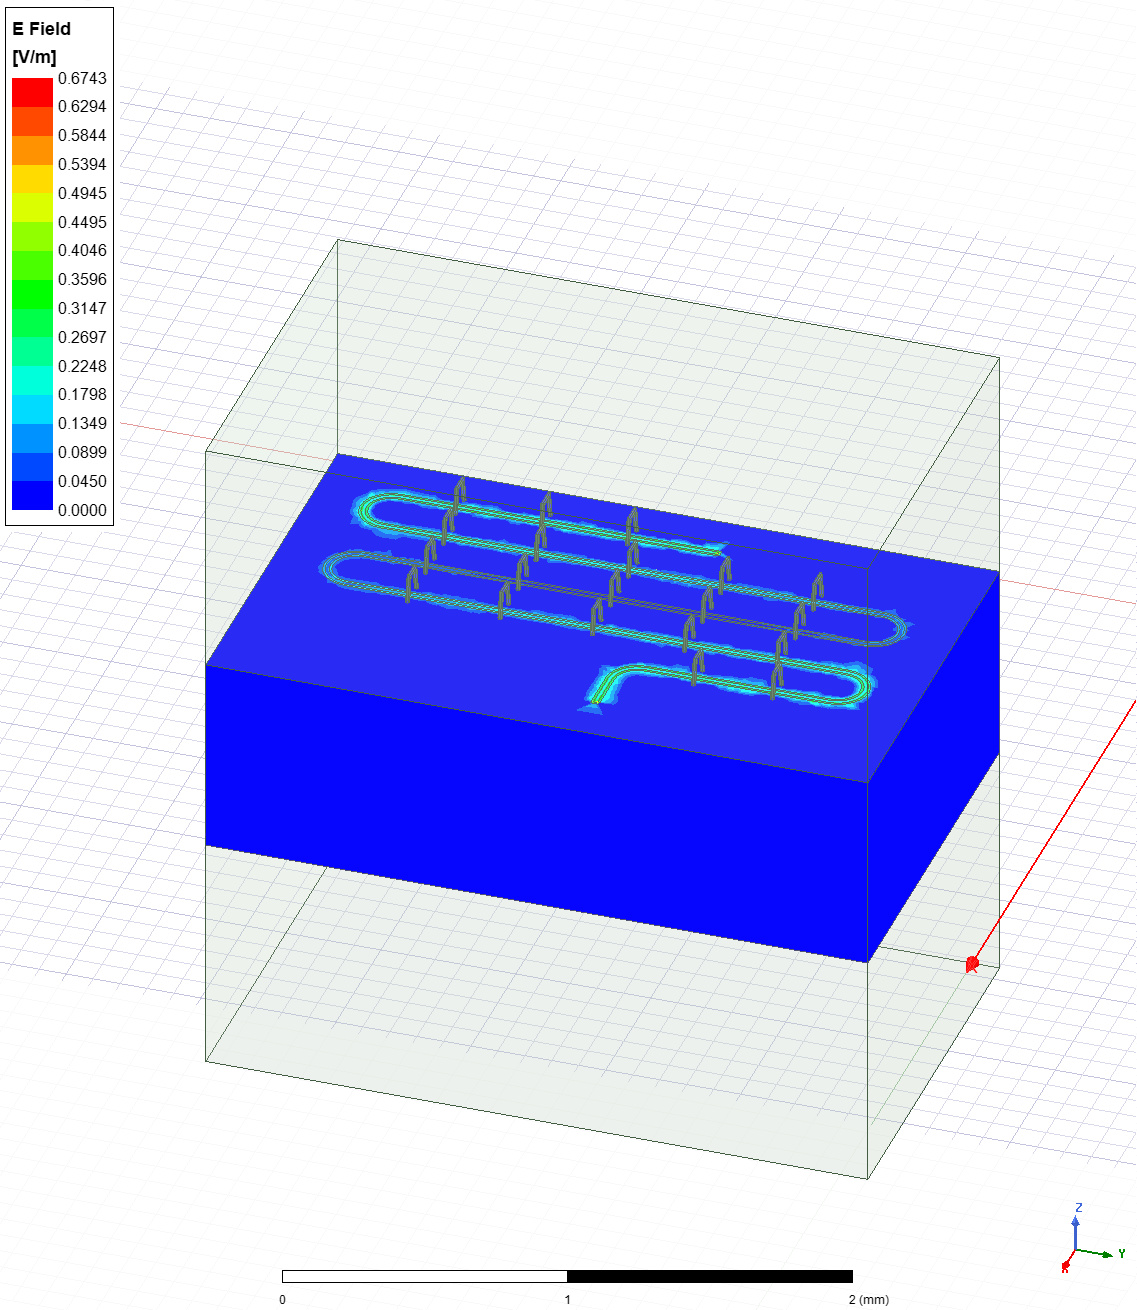

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/ansys.png')

In [123]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [124]:
hfss.epr_get_frequencies()

Design "cavity6" info:
	# eigenmodes    1
	# variations    1


,,Freq. (GHz),Quality Factor
variation,mode,,
0,0,6.538958,inf


In [125]:
QAnsysRenderer.get_template_options(design)

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.2,
 'y_buffer_width_mm': 0.2,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [126]:
QAnsysRenderer.default_setup

{'drivenmodal': {'name': 'Setup',
  'freq_ghz': '5.0',
  'max_delta_s': '0.1',
  'max_passes': '10',
  'min_passes': '1',
  'min_converged': '1',
  'pct_refinement': '30',
  'basis_order': '1'},
 'eigenmode': {'name': 'Setup',
  'min_freq_ghz': '1',
  'n_modes': '1',
  'max_delta_f': '0.5',
  'max_passes': '10',
  'min_passes': '1',
  'min_converged': '1',
  'pct_refinement': '30',
  'basis_order': '-1'},
 'q3d': {'name': 'Setup',
  'freq_ghz': '5.0',
  'save_fields': 'False',
  'enabled': 'True',
  'max_passes': '15',
  'min_passes': '2',
  'min_converged_passes': '2',
  'percent_error': '0.5',
  'percent_refinement': '30',
  'auto_increase_solution_order': 'True',
  'solution_order': 'High',
  'solver_type': 'Iterative'},
 'port_inductor_gap': '10um'}

In [84]:
hfss.disconnect_ansys()

In [127]:
hfss.clean_active_design()

In [128]:
hfss.activate_eigenmode_design("allchip")

03:49PM 40s WARNING [activate_eigenmode_design]: This method is deprecated. Change your scripts to use activate_ansys_design()
03:49PM 40s WARNING [activate_ansys_design]: The design_name=allchip was not in active project.  Designs in active project are: 
['cavity1', 'cavity3', 'cavity2', 'cavity5', 'cavity6', 'cavity4'].  A new design will be added to the project.  
INFO 03:49PM [connect_design]: 	Opened active design
	Design:    allchip [Solution type: Eigenmode]
WARNING 03:49PM [connect_setup]: 	No design setup detected.
WARNING 03:49PM [connect_setup]: 	Creating eigenmode default setup.
INFO 03:49PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [11]:
hfss.options['x_buffer_width_mm'] = 0.9
hfss.options['y_buffer_width_mm'] = 0.9
hfss.options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.5,
 'y_buffer_width_mm': 0.5,
 'wb_threshold': '400mm',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [129]:
design.qgeometry.tables['junction']

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,hfss_resistance,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name
0,67,inductor,"LINESTRING (-1.75000 -1.86250, -1.85000 -1.86250)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction
1,67,rect_jj,"LINESTRING (-1.81500 -1.80000, -1.78500 -1.80000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction
2,68,inductor,"LINESTRING (1.85000 -1.86250, 1.75000 -1.86250)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction
3,68,rect_jj,"LINESTRING (1.78500 -1.80000, 1.81500 -1.80000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction
4,69,inductor,"LINESTRING (-2.05000 0.76250, -1.95000 0.76250)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction
5,69,rect_jj,"LINESTRING (-1.98500 0.70000, -2.01500 0.70000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction
6,70,inductor,"LINESTRING (1.95000 0.86250, 2.05000 0.86250)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction
7,70,rect_jj,"LINESTRING (2.01500 0.80000, 1.98500 0.80000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction
8,71,inductor,"LINESTRING (-2.35000 3.26250, -2.25000 3.26250)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction
9,71,rect_jj,"LINESTRING (-2.28500 3.20000, -2.31500 3.20000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction


In [130]:
hfss.render_design()


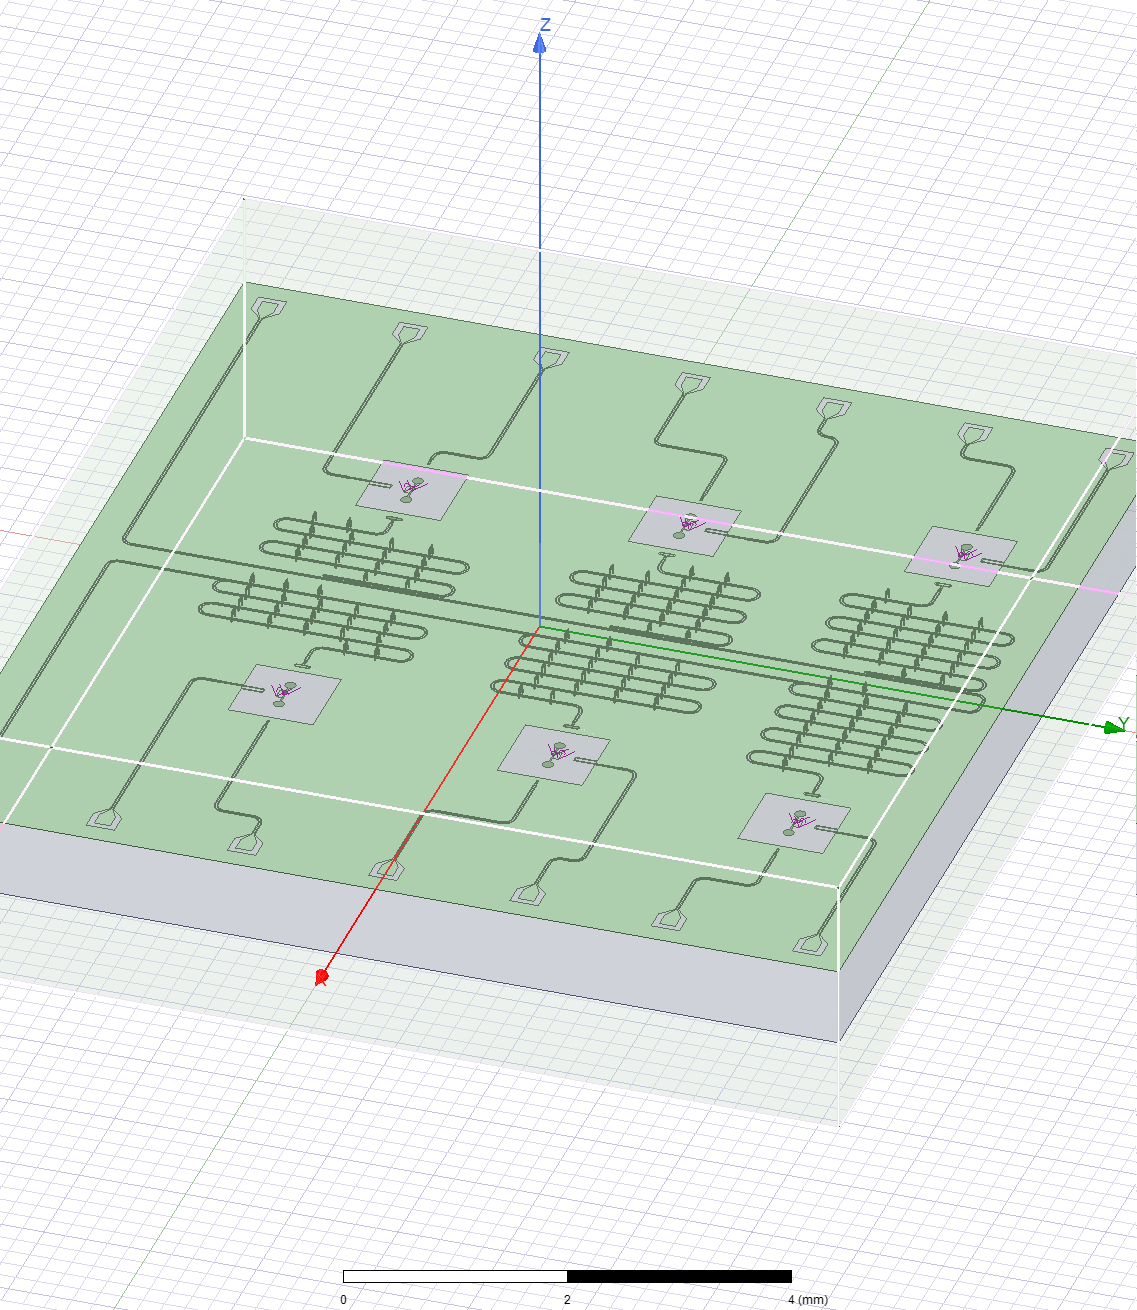

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/ansys.png')

In [131]:
hfss.save_screenshot()

In [132]:
# Analysis properties
setup = hfss.pinfo.setup
setup.n_modes = 2
setup.passes = 15
#setup.delta_f = 0.05
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', '10 nH')
pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 03:57PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 15
Convergence freq max delta percent diff  = 0.1

This method is deprecated. Change your scripts to use the equivalent method plot_convergence() that has been moved inside the EPRanalysis class.


04:54PM 03s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


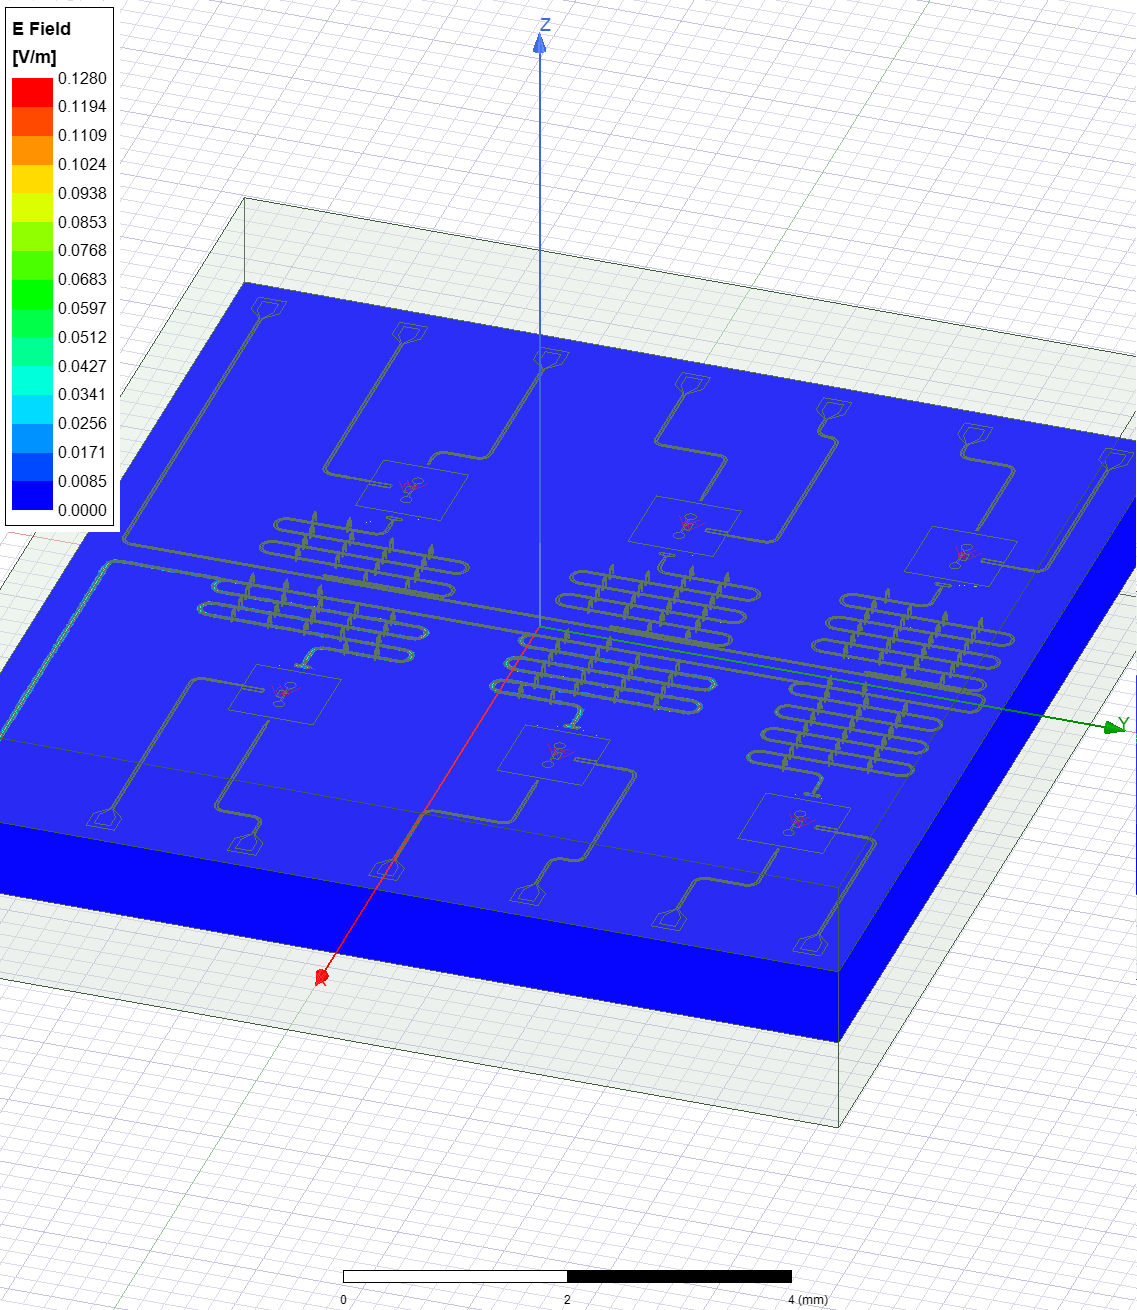

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/ansys.png')

In [133]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [134]:
hfss.plot_ansys_delete(['Mag_E1'])

04:55PM 55s WARNING [plot_ansys_delete]: This method is deprecated. Change your scripts to use clear_fields()


In [135]:
hfss.set_mode(2, "Setup")

INFO 04:56PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


04:56PM 11s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


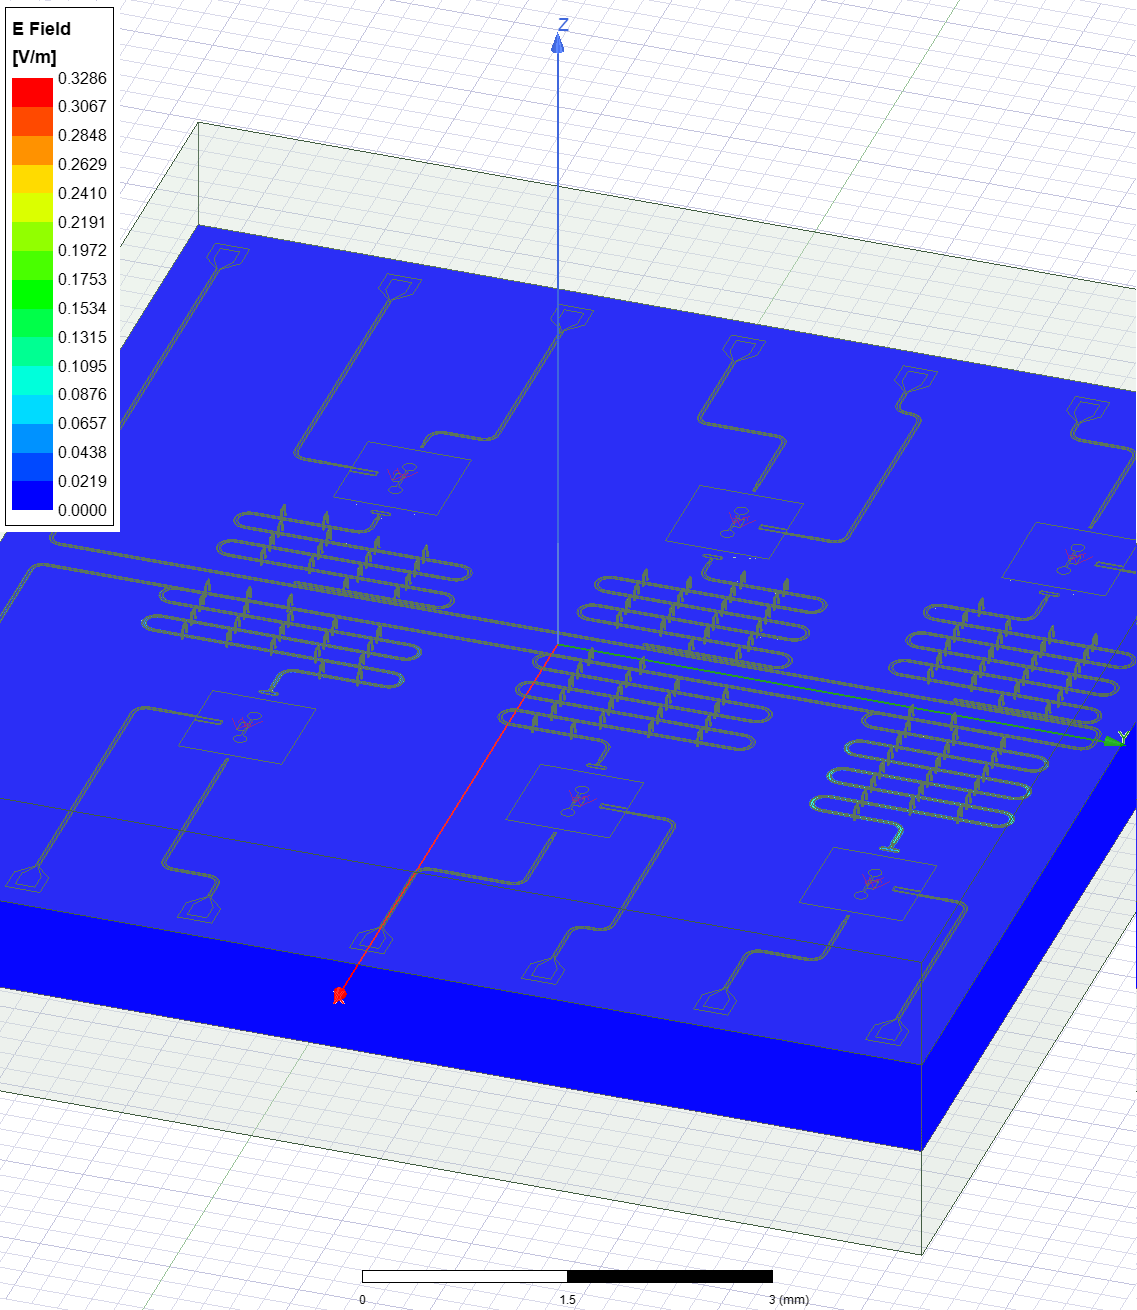

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials/Figen/ansys.png')

In [136]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [137]:
hfss.plot_ansys_delete(['Mag_E1'])

04:57PM 11s WARNING [plot_ansys_delete]: This method is deprecated. Change your scripts to use clear_fields()


In [70]:
hfss.set_mode(3, "Setup")

INFO 02:25PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [71]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')

02:25PM 56s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


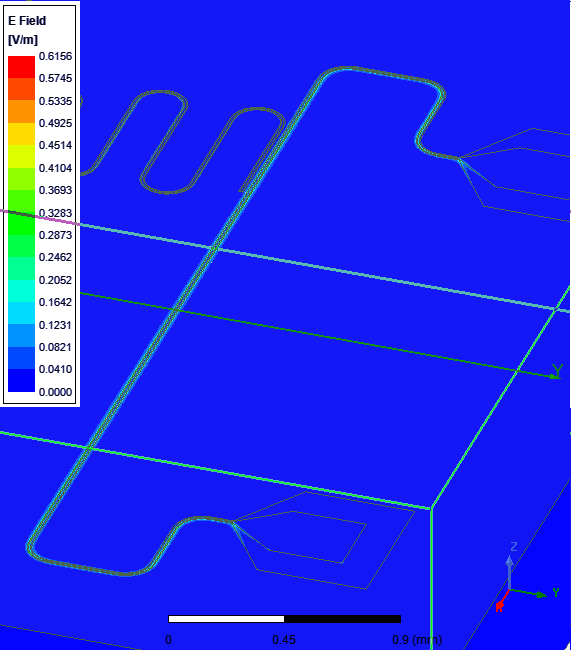

WindowsPath('C:/Users/METAL/Documents/qiskit_metal_fgn/tutorials/Figen/TeethDesignNEW/ansys.png')

In [72]:
hfss.save_screenshot()

In [50]:
hfss.plot_ansys_delete(['Mag_E1'])

02:05PM 33s WARNING [plot_ansys_delete]: This method is deprecated. Change your scripts to use clear_fields()


### Set up EPR parameters
Specify the junctions in the model; in this case there's only one, namely 'jj'.

In [138]:
#Non-linear (Josephson) junction
pinfo = hfss.pinfo # Project info
pinfo.junctions['jj'] = {'Lj_variable': 'Lj', 'rect': 'JJ_rect_Lj_Q1_rect_jj', 
                             'line': 'JJ_Lj_Q1_rect_jj_',  'Cj_variable': 'Cj'}
pinfo.validate_junction_info() # Check that valid names of variables and objects have been supplied
pinfo.dissipative['dielectrics_bulk'] = ['main'] # Dissipative elements: specify
# Handles  microwave analysis on eigenmode solutions
eprd = epr.DistributedAnalysis(pinfo)

Design "allchip" info:
	# eigenmodes    2
	# variations    1


In [139]:
ℰ_elec = eprd.calc_energy_electric()
ℰ_elec_substrate = eprd.calc_energy_electric(None, 'main')
ℰ_mag = eprd.calc_energy_magnetic()

print(f"""
ℰ_elec_all       = {ℰ_elec}
ℰ_elec_substrate = {ℰ_elec_substrate}
EPR of substrate = {ℰ_elec_substrate / ℰ_elec * 100 :.1f}%

ℰ_mag_all       = {ℰ_mag}
ℰ_mag % of ℰ_elec_all  = {ℰ_mag / ℰ_elec * 100 :.1f}%
""")


ℰ_elec_all       = 1.73199292572348e-24
ℰ_elec_substrate = 1.59109222836091e-24
EPR of substrate = 91.9%

ℰ_mag_all       = 1.7319910084364e-24
ℰ_mag % of ℰ_elec_all  = 100.0%



### Run EPR analysis

Perform EPR analysis for all modes and variations. Here, Quantum Analysis starts.

In [140]:
eprd.do_EPR_analysis()

# 4a. Perform Hamiltonian spectrum post-analysis, building on mw solutions using EPR
epra = epr.QuantumAnalysis(eprd.data_filename)
epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 7)

# 4b. Report solved results
swp_variable = 'Lj' # suppose we swept an optimetric analysis vs. inductance Lj_alice
epra.plot_hamiltonian_results(swp_variable=swp_variable)
epra.report_results(swp_variable=swp_variable, numeric=True)


Variation 0  [1/1]

  Mode 0 at 1.25 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%  4.111e-25 4.111e-25

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 99.88%
	jj              1.84488e-09  (+)        2.27037e-12
		(U_tot_cap-U_tot_ind)/mean=0.00%
Calculating Qdielectric_main for mode 0 (0/1)
p_dielectric_main_0 = 0.9149895164134961

  Mode 1 at 2.39 GHz   [2/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%   8.66e-25  8.66e-25

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 99.55%
	jj              6.31174e-10  (+)        2.84612e-12
		(U_tot_cap-U_tot_ind)/mean=0.00%
Calculating Qdiel

  df = df.drop('Unnamed: 9', 1)

  df = pd.read_csv(io.StringIO(text2[3].strip()),



p_dielectric_main_1 = 0.9186482258270693


WARNING 05:01PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project12\allchip\2021-12-24 16-57-31.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0     93.367382
1    877.426073
dtype: float64

Pm_norm idx =
      jj
0  False
1  False
*** P (participation matrix, not normlz.)
             jj
0  1.844884e-09
1  6.311745e-10

*** S (sign-bit matrix)
   s_jj
0     1
1     1
*** P (participation matrix, normalized.)
   1.8e-09
   6.3e-10

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
  4.06e-17 5.31e-17
  5.31e-17 1.74e-17

*** Chi matrix ND (MHz) 
        -0       -0
        -0       -0

*** Frequencies O1 PT (MHz)
0    1248.443985
1    2389.773674
dtype: float64

*** Frequencies ND (MHz)
0    1248.443985
1    2389.773674
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


INFO 05:01PM [__del__]: Disconnected from Ansys HFSS


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,10
eigenmode,
0,1248.44
1,2389.77


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0    1
Lj            
10 0 -0.0 -0.0
   1 -0.0 -0.0

In [141]:
eprd.get_ansys_frequencies_all()

Freq. (GHz)  Quality Factor
variation mode                             
0         0        1.248444             inf
          1        2.389774             inf

In [3]:
??eprd.get_Qseam

Object `eprd.get_Qseam` not found.


In [142]:
eprd.get_Qsurface_all(1, '0')

Calculating Qsurface for mode 1 (1/1)
p_surf_1 = 0.0011887456028802804


Qsurf_1    841222.880301
dtype: float64

In [169]:
eprd.get_Qseam(0, '0')

TypeError: get_Qseam() missing 1 required positional argument: 'variation'

In [147]:
hfss.disconnect_ansys()

In [158]:
gui.main_window.close()

True